# EDA
Análizaremos 2 columnas del Dataset "steam_games.parquet", el cual ha sido limpiado en el archivo "etl_process.ipynb". Primero observaremos los posibles datos nulos que puede tener. Luego analizaremos el comportamiento de la columna "price" en el dataset. Finalmente, echaremos un vistazo a la columna "release_year" y sus posibles relaciones con la columna "price.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_parquet("Datasets/steam_games.parquet")

### Datos nulos

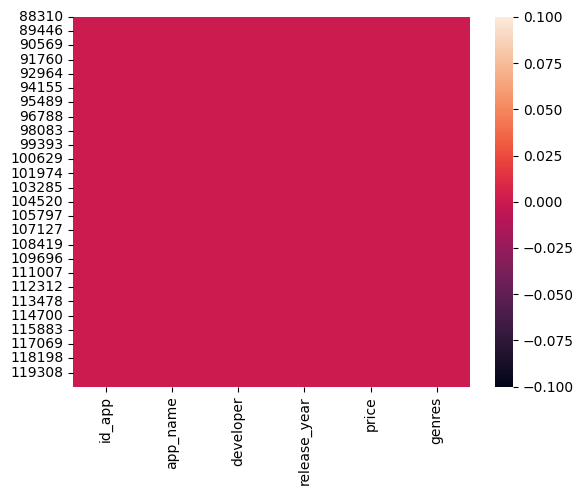

In [13]:
sns.heatmap(data.isnull())
plt.show()

Esto nos muestra que tras el proceso de ETL los datos nulos fueron eliminados completamente del Dataset.

### price

Graficamos un histograma en esta columna para ver la distribución de los datos y buscamos cual es el promedio de los valores de esta columna

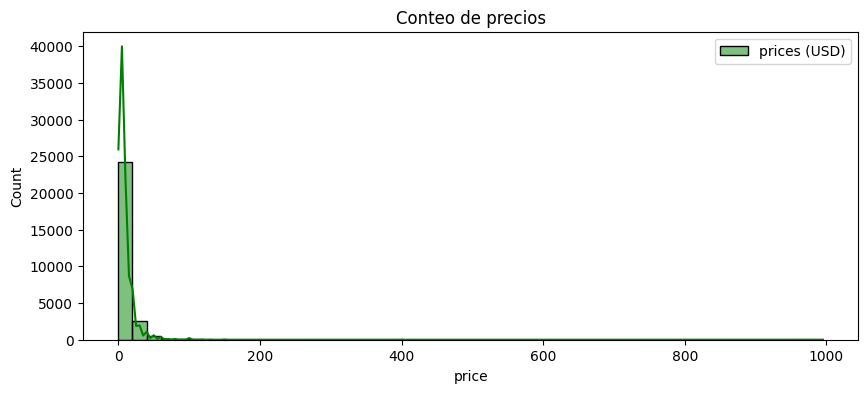

count    27485.000000
mean         9.017743
std         16.057715
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [14]:
plt.figure(figsize = (10, 4))
sns.histplot(data = data, x = "price", bins = 50, kde = True, color = "green", label = "prices (USD)")
plt.title("Conteo de precios")
plt.legend()
plt.show()
data["price"].describe()

En primer lugar observamos que la media de los precios es 9 USD. Ademas, vemos que no hay una gran dispersión de los datos, más sin embargo, podemos deducir una gran cantidad de datos outliers debido a la gran escala que hay en el histograma y el sesgo hacia la izquierda evidenciado en la gráfica

### release_year

Realizamos el gráfico de un histograma para ver la distribución de los años en el Dataset

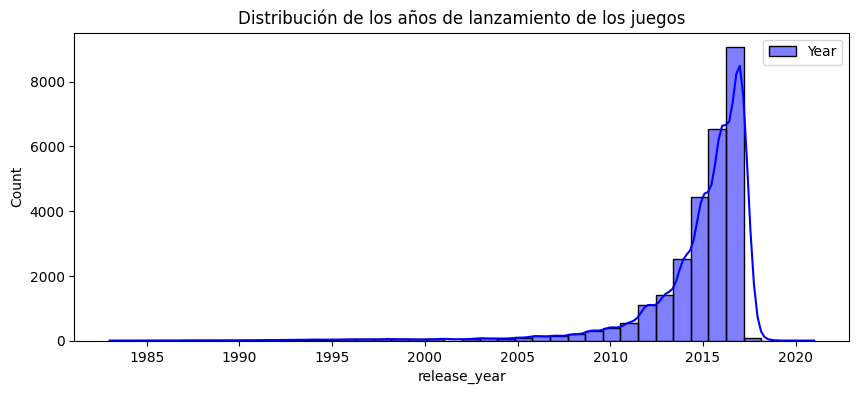

count    27485.000000
mean      2014.866072
std          3.271448
min       1983.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: release_year, dtype: float64
release_year
2017.0    9063
2016.0    6538
2015.0    4433
2014.0    2513
2013.0    1397
2012.0    1102
2011.0     528
2010.0     402
2009.0     308
2008.0     188
2007.0     147
2006.0     140
2005.0      88
2003.0      73
2018.0      69
2004.0      62
2001.0      55
1998.0      48
1999.0      42
2002.0      40
1997.0      39
1996.0      36
2000.0      35
1994.0      31
1995.0      30
1993.0      24
1992.0      13
1991.0      10
1990.0       8
1989.0       7
1988.0       5
1987.0       4
1984.0       2
1983.0       1
1986.0       1
2021.0       1
2019.0       1
1985.0       1
Name: count, dtype: int64


In [15]:
plt.figure(figsize = (10, 4))
sns.histplot(data = data, x = "release_year", bins = 40, kde = True, color = "blue", label = "Year")
plt.title("Distribución de los años de lanzamiento de los juegos")
plt.legend()
plt.show()
print(data["release_year"].describe())
print(data["release_year"].value_counts())

De estos datos vemos que el año de lanzamiento promedio del Dataset es 2014-2015. Además, vemos que hay un sesgo relativamente bajo en comparación a la columna de precios. Esto indica que hay una baja cantidad de valores atípicos en esta columna

Para finalizar realicemos un diagrama de caja para ver la relación entre el año de lanzamiento y el precio de los juegos

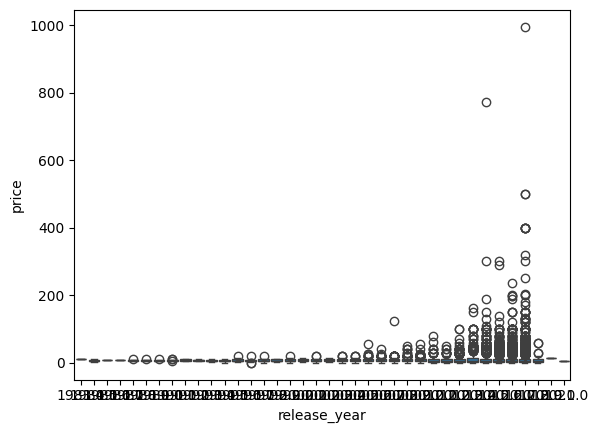

In [16]:
sns.boxplot(x = "release_year", y = "price", data = data)
plt.show()

Concluimos del diagrama de caja que el juego con el precio más alto (995 USD) fue lanzado al mercado en el año 2017 y se ve, claramente, que hace parte de los valores outliers. De hecho, no se distingue fácilmente los valores de los cuartiles de los años